# Data Crawler


In [ ]:
from bs4 import BeautifulSoup
import requests
import re

# Function to check if a URL is valid and matches the desired pattern
def is_valid_url(url):
    if "/video" in url:  # Skip URLs containing "/video"
        return False
    try:
        # Validate URL structure: it should match the pattern https://www.foxnews.com/{category}/{article}
        pattern = r"https://www\.foxnews\.com/[^/]+/[^/]+"
        if not re.match(pattern, url):
            return False

        # Check if the URL returns a status code of 200
        response = requests.head(url, timeout=5)
        return response.status_code == 200
    except requests.RequestException:
        return False

# Fetch the webpage
base_url = "https://www.foxnews.com/"
r = requests.get(base_url)
r_html = r.text

# Parse the HTML
soup = BeautifulSoup(r_html, "html5lib")

# Find all article elements
articles = soup.find_all("article")

# Extract titles and URLs
articles_data = []
for article in articles:
    title_tag = article.find("h3", class_="title")
    link_tag = title_tag.find("a") if title_tag else None

    if title_tag and link_tag:
        title_text = title_tag.get_text(strip=True)
        article_url = link_tag.get("href")
        # Ensure URLs are absolute
        if not article_url.startswith("http"):
            article_url = base_url.rstrip("/") + article_url

        # Validate the URL and skip invalid ones
        if is_valid_url(article_url):
            articles_data.append((title_text, article_url))

# Print titles and URLs
for idx, (title, link) in enumerate(articles_data, start=1):
    print(f"{idx}: {title}")
    print(f"   URL: {link}")

1: Top detective at NYPD hints at heavy toll intense 5-day manhunt for suspect took on officers
   URL: https://www.foxnews.com/live-news/unitedhealthcare-ceo-brian-thompson-murder-live-updates-12-10-2024
2: UPenn prof praises accused CEO killer online — then hides her social media after backlash
   URL: https://www.foxnews.com/media/socialist-upenn-professor-hides-social-media-after-celebratory-post-about-ceo-murder-suspect-goes-viral
3: Republican leading charge on transgender policies allegedly attacked on Capitol grounds
   URL: https://www.foxnews.com/politics/capitol-police-arrest-suspect-allegedly-assaulting-rep-nancy-mace
4: Mom 'horrified' after school allegedly withheld services from her son because of race
   URL: https://www.foxnews.com/politics/wisconsin-mom-mulls-lawsuit-alleging-school-districts-pushing-horrifying-race-based-policy
5: Marine vet explains why he chose to step in on the subway in first interview since acquittal
   URL: https://www.foxnews.com/us/daniel-pen

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

# Function to check if a URL is valid and matches the desired pattern
def is_valid_url(url):
    if "/video" in url or "/category" in url:  # Skip URLs containing "/video"
        return False
    try:
        # Validate URL structure: it should match the pattern https://www.foxnews.com/{category}/{article}
        pattern = r"https://www\.foxnews\.com/[^/]+/[^/]+"
        if not re.match(pattern, url):
            return False

        # Check if the URL returns a status code of 200
        response = requests.head(url, timeout=5)
        return response.status_code == 200
    except requests.RequestException:
        return False

# Function to scrape URLs from a page
def scrape_page(base_url):
    r = requests.get(base_url)
    soup = BeautifulSoup(r.text, "html5lib")
    articles = soup.find_all("article")
    articles_data = []

    for article in articles:
        title_tag = article.find("h4", class_="title")
        link_tag = title_tag.find("a") if title_tag else None

        if title_tag and link_tag:
            title_text = title_tag.get_text(strip=True)
            article_url = link_tag.get("href")
            # Ensure URLs are absolute
            if not article_url.startswith("http"):
                article_url = base_url.rstrip("/") + article_url

            # Validate the URL and skip invalid ones
            if is_valid_url(article_url):
                articles_data.append((title_text, article_url))
    return articles_data

# List of sections to scrape
sections = [
    "https://www.foxnews.com/politics",
    "https://www.foxnews.com/world",
    "https://www.foxnews.com/us",
    "https://www.foxnews.com/entertainment",
    "https://www.foxnews.com/sports",
    "https://www.foxnews.com/tech",
    "https://www.foxnews.com/science",
    "https://www.foxnews.com/health",
]

# Aggregate results from all sections
all_articles = []
for section in sections:
    print(f"Scraping section: {section}")
    all_articles.extend(scrape_page(section))

# Print results
for idx, (title, link) in enumerate(all_articles, start=1):
    print(f"{idx}: {title}")
    print(f"   URL: {link}")


Scraping section: https://www.foxnews.com/politics


KeyboardInterrupt: 

# Data Script

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup
import csv
import requests
from bs4 import BeautifulSoup

# Path to your CSV file
csv_file = "url_only_data.csv"  # Replace with your CSV file path
output_file = "output_nbc.csv"

# Open the CSV file for reading
with open(csv_file, "r") as infile, open(output_file, "w", newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    # Write header for the output file
    writer.writerow(["URL", "Title", "Status", "Source"])

    for row in reader:
        try:
            url = row[0]  # Assuming URL is in the first column of the CSV

            # Determine the source (0 for nbc, 1 for foxnews)
            if "nbcnews" in url:
                continue
            elif "foxnews" in url:
                source = 1
            else:
                source = "Unknown"  # Optional, for other domains

            response = requests.get(url)
            if response.status_code != 200:
                raise Exception(f"Failed to load page {url}: Status code {response.status_code}")

            # Parse HTML using BeautifulSoup
            soup = BeautifulSoup(response.text, "html.parser")
            title = title = soup.title

            # Extract title text if it exists
            if title:
                title_text = title.get_text(strip=True)
            else:
                title_text = "Title not found"

            # Write result to the output CSV
            writer.writerow([url, title_text, "Success", source])

        except Exception as e:
            # Handle errors and log them
            writer.writerow([row[0], "", f"Error: {e}", "Unknown"])


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-d1f13424a617>", line 32, in <cell line: 13>
    response = requests.get(url)
  File "/usr/local/lib/python3.10/dist-packages/requests/api.py", line 73, in get
    return request("get", url, params=params, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/api.py", line 59, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/sessions.py", line 589, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/sessions.py", line 703, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/adapters.py", line 667, in send
    resp = conn.urlopen(
  File "/usr/local/lib/python3.10/dist-pa

TypeError: object of type 'NoneType' has no len()

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

# File paths
input_csv = "url_only_data.csv"  # Input CSV with URLs
output_csv = "output.csv"  # Output CSV for classified results

# Open input and output CSV files
with open(input_csv, "r") as infile, open(output_csv, "w", newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    # Skip the header row and write a new header for the output file
    header = next(reader, None)
    writer.writerow(["URL", "Title", "Status", "Source"])  # Fox=1, NBC=0

    for row in reader:
        if not row or not row[0].strip():  # Skip empty rows or rows with empty URLs
            continue

        url = row[0].strip()  # Get URL and remove surrounding whitespace

        # Determine the source based on the URL
        if "nbcnews" in url:
            source = 0  # NBC News
        elif "foxnews" in url:
            source = 1  # Fox News
        else:
            source = "Unknown"

        try:
            # Fetch the URL content
            response = requests.get(url, timeout=10)  # Set a timeout to avoid hanging
            if response.status_code != 200:
                raise Exception(f"HTTP {response.status_code}")

            # Parse the HTML and extract the title
            soup = BeautifulSoup(response.text, "html.parser")
            title_tag = soup.title
            title_text = title_tag.get_text(strip=True) if title_tag else "Title not found"

            # Write successful result to the CSV
            writer.writerow([url, title_text, "Success", source])

        except Exception as e:
            # Log errors in the output CSV
            writer.writerow([url, "", f"Error: {e}", source])

# Data Cleaning

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
data = pd.read_csv('output.csv')
data.nunique()

FileNotFoundError: [Errno 2] No such file or directory: 'output.csv'

1. Remove non-alphanumeric characters and convert to lowercase
2. Remove stopwords (eg. to, for...)
3. Lemmatize words (eg. convert saying/said to say)

In [ ]:
def clean_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^A-Za-z0-9\s]', '', text).lower()

    # Remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]

    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)

    return text

Add two columns: 1. word count, 2. character count. (觉得可能有点用)

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Convert to string to handle potential non-string values
    if not isinstance(text, str):
        text = str(text)

    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^A-Za-z0-9\s]', '', text).lower()

    # Remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]

    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)

    return text

In [ ]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
stop_words.discard("not")
lemmatizer = WordNetLemmatizer()

# Apply cleaning function to the "Title" column
data['Cleaned_Title'] = data['Title'].apply(clean_text)

# Remove rows with empty cleaned titles
data = data[data['Cleaned_Title'].str.strip() != ""]

# Add a column for word count
data['Word_Count'] = data['Cleaned_Title'].apply(lambda x: len(x.split()))

# Add a column for character count
data['Character_Count'] = data['Cleaned_Title'].apply(len)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data
data.to_csv('ready_to_train.csv', index=False)

In [ ]:
import csv
import pandas as pd
news_df = pd.read_csv('ready_to_train.csv')

# Visualization of Words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


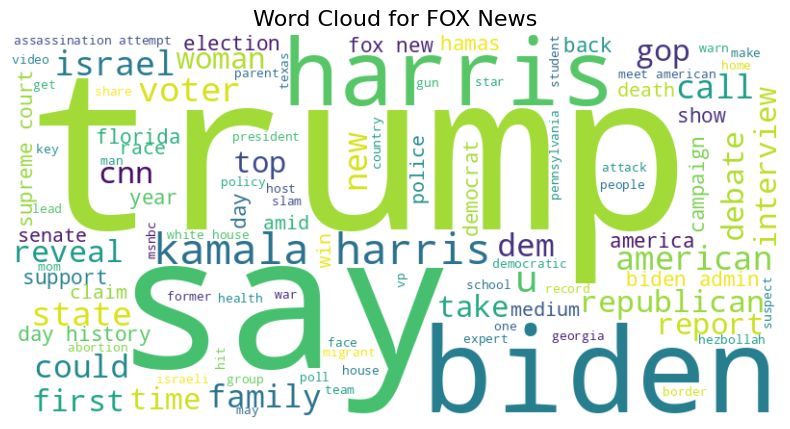

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
stop = set(stopwords.words('english'))

fox = news_df[news_df['Source'] == 0]['Cleaned_Title']
fox_text = " ".join(fox)

wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=100, width=800, height=400).generate(fox_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for FOX News", fontsize=16)
plt.show()

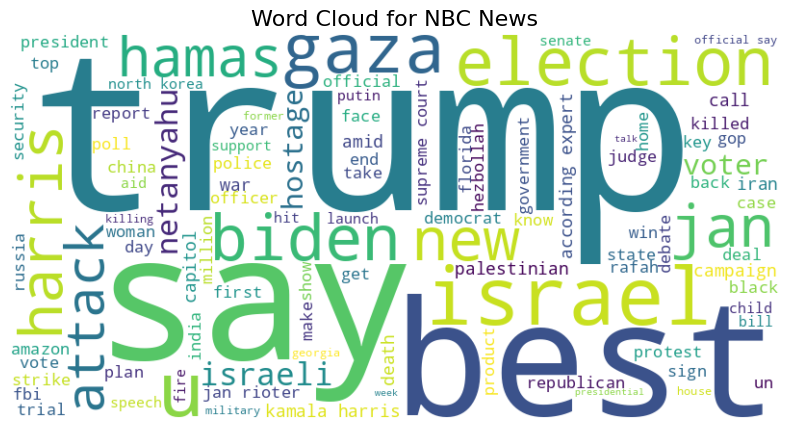

In [ ]:
nbc = news_df[news_df['Source'] == 1]['Cleaned_Title']
nbc_text = " ".join(nbc)

wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=100, width=800, height=400).generate(nbc_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for NBC News", fontsize=16)
plt.show()

# EDA

In [ ]:
avg_length = news_df[news_df['Source'] == 1]['Cleaned_Title'].apply(len).mean()
avg_length

##fox news longer, also more occurrence of ''

59.026038781163436

In [ ]:
news_df[news_df['Source'] == 1]['Title'].apply(lambda x: x.count("'")).mean()

0.42382271468144045

In [ ]:
news_df[news_df['Source'] == 0]['Title'].apply(lambda x: x.count("'")).mean()

1.115

In [ ]:
import string
news_df[news_df['Source'] == 0]['Title'].apply(lambda x: sum(1 for char in x if char in string.punctuation)).mean()

2.186

In [ ]:
news_df[news_df['Source'] == 1]['Title'].apply(lambda x: sum(1 for char in x if char in string.punctuation)).mean()

1.421606648199446

In [ ]:
pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load the pre-trained spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Function to count named entities in a title
def count_names(title):
    doc = nlp(title)
    # Count entities labeled as PERSON or ORG (organizations)
    return sum(1 for ent in doc.ents if ent.label_ in ['PERSON', 'ORG'])

# Apply the function to the 'Title' column and compute the average
avg_names = news_df[news_df['Source'] == 0]['Title'].apply(count_names).mean()

print(f"Average number of names (persons or organizations) in the 'Title' column: {avg_names}")

Average number of names (persons or organizations) in the 'Title' column: 1.28


In [ ]:
news_df[news_df['Source'] == 1]['Title'].apply(count_names).mean()

0.9074792243767313

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(title):
    return sia.polarity_scores(title)['compound']  # 'compound' score gives overall sentiment

# Filter rows where Source == 1 and calculate sentiment score for each headline
filtered_titles = news_df[news_df['Source'] == 1]['Title']
sentiment_scores = filtered_titles.apply(get_sentiment_score)

# Calculate the average sentiment score
avg_sentiment_score = sentiment_scores.mean()

print(f"Average sentiment score for Source 1 headlines: {avg_sentiment_score}")

Average sentiment score for Source 1 headlines: -0.04948132963988919


In [ ]:
filtered_titles = news_df[news_df['Source'] == 0]['Title']
sentiment_scores = filtered_titles.apply(get_sentiment_score)

# Calculate the average sentiment score
avg_sentiment_score = sentiment_scores.mean()

print(f"Average sentiment score for Source 0 headlines: {avg_sentiment_score}")

Average sentiment score for Source 0 headlines: -0.09178829999999999


In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity from TextBlob
def get_sentiment_polarity(title):
    return TextBlob(title).sentiment.polarity  # Polarity score ranges from -1 (negative) to +1 (positive)

# Apply sentiment analysis to 'Title' column for rows where Source == 1
filtered_titles = news_df[news_df['Source'] == 1]['Title']
sentiment_scores = filtered_titles.apply(get_sentiment_polarity)

# Calculate the average sentiment score
avg_sentiment_score = sentiment_scores.mean()

print(f"Average sentiment polarity for Source 1 headlines: {avg_sentiment_score}")

Average sentiment polarity for Source 1 headlines: 0.10893991924255082


In [ ]:
# Apply sentiment analysis to 'Title' column for rows where Source == 1
filtered_titles = news_df[news_df['Source'] == 0]['Title']
sentiment_scores = filtered_titles.apply(get_sentiment_polarity)

# Calculate the average sentiment score
avg_sentiment_score = sentiment_scores.mean()

print(f"Average sentiment polarity for Source 1 headlines: {avg_sentiment_score}")

Average sentiment polarity for Source 1 headlines: 0.035563412259037266


# Baseline: Logistic with TF-IDF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
news_df = pd.read_csv('ready_to_train.csv')
X = news_df['Cleaned_Title']
y = news_df['Source']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert the text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=100)
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

NameError: name 'pd' is not defined

# Evaluation

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Use Embedding: BertModel


In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

# 1. Load dataset
csv_file_path = 'ready_to_train.csv'  # Replace with your actual file path
news_df = pd.read_csv(csv_file_path)

# 2. Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# 3. Function to get embeddings
def get_bert_embedding(text, tokenizer, model, max_length=128):
    # Tokenize and encode text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=max_length)
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract [CLS] token embedding
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embedding

# 4. Extract embeddings for each title
embeddings = []
for text in tqdm(news_df['Title'], desc="Extracting Embeddings"):
    embedding = get_bert_embedding(text, tokenizer, bert_model)
    embeddings.append(embedding)

# Convert embeddings to a DataFrame
embeddings_df = pd.DataFrame(embeddings)
embeddings_df['Source'] = news_df['Source']  # Add labels

# 5. Save to CSV
output_csv_path = 'embeddings.csv'
embeddings_df.to_csv(output_csv_path, index=False)
print(f"Embeddings saved to {output_csv_path}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Extracting Embeddings: 100%|██████████| 3805/3805 [08:02<00:00,  7.88it/s]


Embeddings saved to embeddings.csv


## Embedding with XGBoost

In [ ]:
import pandas as pd
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()
def get_sentiment_score(title):
    return sia.polarity_scores(title)['compound']
def load_data():
  embeddings_df = pd.read_csv('embeddings.csv')
  data = pd.read_csv('ready_to_train.csv')
  word_char_features = data[['Word_Count', 'Character_Count']].values
  embeddings = embeddings_df.drop('Source', axis=1).values
  punctuation_counts = data['Title'].apply(lambda x: sum(1 for char in x if char in string.punctuation)).values.reshape(-1, 1)
  X = np.hstack((embeddings, word_char_features, punctuation_counts))
  y = embeddings_df['Source'].values
  return X, y

## Embedding with SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X, y = load_data()

# Split the data (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define and train the SGD Classifier
model_sgd = SGDClassifier(max_iter=1000, random_state=42)
model_sgd.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_sgd = model_sgd.predict(X_test_scaled)

# Evaluate the SGD Classifier
evaluate_model(y_test, y_pred_sgd, "SGD Classifier")



Model: SGD Classifier
Accuracy: 0.7346
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       400
           1       0.72      0.72      0.72       361

    accuracy                           0.73       761
   macro avg       0.73      0.73      0.73       761
weighted avg       0.73      0.73      0.73       761

Confusion Matrix:
[[299 101]
 [101 260]]


## Embedding with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X, y = load_data()

# Split the data (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")


Model: Random Forest
Accuracy: 0.7214
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75       400
           1       0.74      0.63      0.68       361

    accuracy                           0.72       761
   macro avg       0.73      0.72      0.72       761
weighted avg       0.72      0.72      0.72       761

Confusion Matrix:
[[322  78]
 [134 227]]


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Step 1: Load the dataset
# Let's assume your dataset has two columns: 'Source' (0 or 1) and 'Title' (the news headlines)
news_df = pd.read_csv('ready_to_train.csv')

# DistilBERT

In [ ]:
!pip install datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import evaluate

# ------------------------------------------------------------
# Step 1: Load Data
# ------------------------------------------------------------
df = pd.read_csv("ready_to_train.csv")["Title", "Source"]

# Make sure data is in the expected format
# If "Cleaned_Title" has missing or invalid values, handle that here.
# Assuming Source is already an integer label (0 and 1 for a binary classification)
df["labels"] = df["Source"]  # Create a labels column from Source

# ------------------------------------------------------------
# Step 2: Split into training and validation sets
# ------------------------------------------------------------
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["labels"])

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df, preserve_index=False)
val_dataset = Dataset.from_pandas(val_df, preserve_index=False)

# ------------------------------------------------------------
# Step 3: Load Tokenizer and Model
# ------------------------------------------------------------
model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["Title"], truncation=True, padding="max_length", max_length=64)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Set the dataset format for PyTorch and remove unused columns
train_dataset = train_dataset.remove_columns(["Title", "Cleaned_Title"])
val_dataset = val_dataset.remove_columns(["Title", "Cleaned_Title"])

train_dataset = train_dataset.with_format("torch")
val_dataset = val_dataset.with_format("torch")

# ------------------------------------------------------------
# Step 4: Load Model
# ------------------------------------------------------------
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# ------------------------------------------------------------
# Step 5: Define the Training Arguments
# ------------------------------------------------------------
training_args = TrainingArguments(
    output_dir="./model_output",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True
)

# ------------------------------------------------------------
# Step 6: Define the Compute Metrics Function
# ------------------------------------------------------------
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    labels = p.label_ids
    acc = accuracy_metric.compute(predictions=preds, references=labels)
    f1 = f1_metric.compute(predictions=preds, references=labels, average="weighted")
    return {"accuracy": acc["accuracy"], "f1": f1["f1"]}

# ------------------------------------------------------------
# Step 7: Initialize the Trainer
# ------------------------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# ------------------------------------------------------------
# Step 8: Train the Model
# ------------------------------------------------------------
trainer.train()

# ------------------------------------------------------------
# Step 9: Evaluate the Model
# ------------------------------------------------------------
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# After training, you can save the model
trainer.save_model("./final_model")

# ------------------------------------------------------------
# Optional: Predict on New Headlines
# ------------------------------------------------------------
# If you have new headlines to predict:
# new_headlines = ["This is a new Fox headline", "Breaking news from NBC"]
# encoded = tokenizer(new_headlines, truncation=True, padding="max_length", max_length=64, return_tensors="pt")
# outputs = model(**encoded)
# preds = torch.argmax(outputs.logits, dim=-1)
# print("Predictions:", preds)  # 0 for Fox, 1 for NBC

Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-4-55a1d7fff52f>:85: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.503000,0.550282,0.747700,0.743266
2,0.319300,0.549753,0.810775,0.808581
3,0.243700,0.656113,0.810775,0.810574


Evaluation Results: {'eval_loss': 0.5497534871101379, 'eval_accuracy': 0.8107752956636005, 'eval_f1': 0.8085812008142648, 'eval_runtime': 1.5715, 'eval_samples_per_second': 484.259, 'eval_steps_per_second': 61.089, 'epoch': 3.0}


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the DistilBERT model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2,
).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.467497
2,No log,0.450127
3,0.388900,0.475072


Evaluation Results: {'eval_loss': 0.4501267671585083, 'eval_runtime': 0.7704, 'eval_samples_per_second': 987.834, 'eval_steps_per_second': 62.308, 'epoch': 3.0}
Test Accuracy: 0.8055


## with cross validation

In [ ]:
!pip install datasets
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import evaluate

# ------------------------------------------------------------
# Step 1: Load Data
# ------------------------------------------------------------
df = pd.read_csv("ready_to_train.csv")

# Create labels column
df["labels"] = df["Source"]
df = df.dropna(subset=["Title", "labels"])  # ensure no missing values

# ------------------------------------------------------------
# Cross-validation setup
# ------------------------------------------------------------
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    labels = p.label_ids
    acc = accuracy_metric.compute(predictions=preds, references=labels)
    f1 = f1_metric.compute(predictions=preds, references=labels, average="weighted")
    return {"accuracy": acc["accuracy"], "f1": f1["f1"]}

# Storage for cross-validation results
fold_results = []

# ------------------------------------------------------------
# K-Fold Cross Validation Loop
# ------------------------------------------------------------
for fold, (train_idx, val_idx) in enumerate(skf.split(df, df["labels"])):
    print(f"===== Fold {fold+1}/{num_folds} =====")

    # Create train and validation DataFrames
    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]

    # Convert to Hugging Face datasets
    train_dataset = Dataset.from_pandas(train_df, preserve_index=False)
    val_dataset = Dataset.from_pandas(val_df, preserve_index=False)

    # Tokenization function
    def tokenize_function(examples):
        return tokenizer(examples["Cleaned_Title"], truncation=True, padding="max_length", max_length=64)

    train_dataset = train_dataset.map(tokenize_function, batched=True)
    val_dataset = val_dataset.map(tokenize_function, batched=True)

    # Remove unused columns and set format
    train_dataset = train_dataset.remove_columns(["Title", "Cleaned_Title", "Source"])  # remove source if not needed
    val_dataset = val_dataset.remove_columns(["Title", "Cleaned_Title", "Source"])

    train_dataset = train_dataset.with_format("torch")
    val_dataset = val_dataset.with_format("torch")

    # Load fresh model for each fold
    model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

    # Define training arguments for each fold
    training_args = TrainingArguments(
        output_dir=f"./model_output_fold_{fold}",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir=f'./logs_fold_{fold}',
        logging_steps=50,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,
        seed=42  # ensure reproducibility
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    # Train the model for this fold
    trainer.train()

    # Evaluate the model on the validation fold
    eval_results = trainer.evaluate()
    print(f"Fold {fold+1} results: {eval_results}")

    fold_results.append(eval_results)

# ------------------------------------------------------------
# Aggregate results across folds
# ------------------------------------------------------------
avg_accuracy = sum(r["eval_accuracy"] for r in fold_results) / num_folds
avg_f1 = sum(r["eval_f1"] for r in fold_results) / num_folds

print("===== Cross-Validation Results =====")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average F1: {avg_f1:.4f}")

# After completing cross-validation, you may choose one fold's best model
# or retrain on the full dataset with chosen hyperparameters.

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

===== Fold 1/5 =====


Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-10-f207e8f178e6>:88: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.466000,0.488953,0.791064,0.789684
2,0.320700,0.474551,0.817346,0.817131
3,0.233400,0.609975,0.825230,0.825163


Fold 1 results: {'eval_loss': 0.6099750995635986, 'eval_accuracy': 0.8252299605781866, 'eval_f1': 0.825163345179878, 'eval_runtime': 1.5677, 'eval_samples_per_second': 485.433, 'eval_steps_per_second': 61.237, 'epoch': 3.0}
===== Fold 2/5 =====


Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-10-f207e8f178e6>:88: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.534000,0.554560,0.779238,0.776678
2,0.378700,0.657115,0.741130,0.738601
3,0.228100,0.892832,0.775296,0.775443


Fold 2 results: {'eval_loss': 0.5545603036880493, 'eval_accuracy': 0.7792378449408672, 'eval_f1': 0.7766780676166424, 'eval_runtime': 1.8091, 'eval_samples_per_second': 420.659, 'eval_steps_per_second': 53.066, 'epoch': 3.0}
===== Fold 3/5 =====


Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-10-f207e8f178e6>:88: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.468300,0.516690,0.777924,0.774570
2,0.341500,0.629576,0.792378,0.791525
3,0.189000,0.798484,0.788436,0.788574


Fold 3 results: {'eval_loss': 0.6295764446258545, 'eval_accuracy': 0.7923784494086727, 'eval_f1': 0.7915250212174915, 'eval_runtime': 1.7764, 'eval_samples_per_second': 428.4, 'eval_steps_per_second': 54.043, 'epoch': 3.0}
===== Fold 4/5 =====


Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-10-f207e8f178e6>:88: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.488900,0.516645,0.760841,0.760533
2,0.319900,0.504315,0.788436,0.787848
3,0.153900,0.801578,0.804205,0.804096


Fold 4 results: {'eval_loss': 0.8015784621238708, 'eval_accuracy': 0.8042049934296978, 'eval_f1': 0.8040957292255477, 'eval_runtime': 1.6631, 'eval_samples_per_second': 457.569, 'eval_steps_per_second': 57.722, 'epoch': 3.0}
===== Fold 5/5 =====


Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-10-f207e8f178e6>:88: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.545100,0.469253,0.793693,0.788479
2,0.337800,0.485819,0.795007,0.794669
3,0.255600,0.584917,0.831800,0.831657


Fold 5 results: {'eval_loss': 0.5849165916442871, 'eval_accuracy': 0.8318002628120894, 'eval_f1': 0.8316573548650404, 'eval_runtime': 1.6306, 'eval_samples_per_second': 466.696, 'eval_steps_per_second': 58.874, 'epoch': 3.0}
===== Cross-Validation Results =====
Average Accuracy: 0.8066
Average F1: 0.8058


## cross validation for roberta

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import torch
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import evaluate

# ------------------------------------------------------------
# Step 1: Load Data
# ------------------------------------------------------------
df = pd.read_csv("ready_to_train.csv")

# Create labels column
df["labels"] = df["Source"]
# Drop rows missing essential fields and also remove URL column from consideration
df = df.dropna(subset=["Title", "labels"])
df = df.drop(columns=["URL"])  # Ensure URL is not used

# ------------------------------------------------------------
# Cross-validation setup
# ------------------------------------------------------------
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

model_name = "roberta-base"
tokenizer = RobertaTokenizerFast.from_pretrained(model_name)

accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    labels = p.label_ids
    acc = accuracy_metric.compute(predictions=preds, references=labels)
    f1 = f1_metric.compute(predictions=preds, references=labels, average="weighted")
    return {"accuracy": acc["accuracy"], "f1": f1["f1"]}

# Storage for cross-validation results
fold_results = []

# ------------------------------------------------------------
# K-Fold Cross Validation Loop
# ------------------------------------------------------------
for fold, (train_idx, val_idx) in enumerate(skf.split(df, df["labels"])):
    print(f"===== Fold {fold+1}/{num_folds} =====")

    # Create train and validation DataFrames
    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]

    # Convert to Hugging Face datasets
    train_dataset = Dataset.from_pandas(train_df, preserve_index=False)
    val_dataset = Dataset.from_pandas(val_df, preserve_index=False)

    # Tokenization function
    # Use "Title" instead of "Cleaned_Title"
    def tokenize_function(examples):
        return tokenizer(examples["Title"], truncation=True, padding="max_length", max_length=64)

    train_dataset = train_dataset.map(tokenize_function, batched=True)
    val_dataset = val_dataset.map(tokenize_function, batched=True)

    # Remove unused columns
    # Keep "labels" and the tokenized features. Remove "Title", "Source", "Word_Count", "Character_Count", "Cleaned_Title" if it exists.
    remove_cols = [col for col in train_dataset.column_names if col not in ["input_ids", "attention_mask", "labels"]]
    train_dataset = train_dataset.remove_columns(remove_cols)
    val_dataset = val_dataset.remove_columns(remove_cols)

    # Format as torch
    train_dataset = train_dataset.with_format("torch")
    val_dataset = val_dataset.with_format("torch")

    # Load fresh model for each fold
    model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=2)

    # Define training arguments for each fold
    training_args = TrainingArguments(
        output_dir=f"./model_output_fold_{fold}",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir=f'./logs_fold_{fold}',
        logging_steps=50,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,
        seed=42  # ensure reproducibility
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    # Train the model for this fold
    trainer.train()

    # Evaluate the model on the validation fold
    eval_results = trainer.evaluate()
    print(f"Fold {fold+1} results: {eval_results}")

    fold_results.append(eval_results)

# ------------------------------------------------------------
# Aggregate results across folds
# ------------------------------------------------------------
avg_accuracy = sum(r["eval_accuracy"] for r in fold_results) / num_folds
avg_f1 = sum(r["eval_f1"] for r in fold_results) / num_folds

print("===== Cross-Validation Results =====")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average F1: {avg_f1:.4f}")

===== Fold 1/5 =====


Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-1bb9ff0547cb>:94: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.264400,0.348207,0.886991,0.886895
2,0.177400,0.266663,0.936925,0.936960
3,0.118500,0.282461,0.935611,0.935653


Fold 1 results: {'eval_loss': 0.26666259765625, 'eval_accuracy': 0.9369250985545335, 'eval_f1': 0.9369604314569048, 'eval_runtime': 2.6871, 'eval_samples_per_second': 283.209, 'eval_steps_per_second': 35.727, 'epoch': 3.0}
===== Fold 2/5 =====


Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-1bb9ff0547cb>:94: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.318500,0.298447,0.905388,0.905400
2,0.184400,0.259757,0.934297,0.934316
3,0.165900,0.236775,0.939553,0.939587


Fold 2 results: {'eval_loss': 0.23677465319633484, 'eval_accuracy': 0.9395532194480947, 'eval_f1': 0.9395870801462005, 'eval_runtime': 2.7795, 'eval_samples_per_second': 273.79, 'eval_steps_per_second': 34.539, 'epoch': 3.0}
===== Fold 3/5 =====


Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-1bb9ff0547cb>:94: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.312600,0.364020,0.886991,0.886678
2,0.257900,0.379952,0.885677,0.885378
3,0.253300,0.317334,0.890933,0.890579


Fold 3 results: {'eval_loss': 0.3173341751098633, 'eval_accuracy': 0.8909329829172142, 'eval_f1': 0.8905791931302087, 'eval_runtime': 2.7072, 'eval_samples_per_second': 281.104, 'eval_steps_per_second': 35.461, 'epoch': 3.0}
===== Fold 4/5 =====


Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-1bb9ff0547cb>:94: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.262900,0.262385,0.897503,0.897533
2,0.202400,0.290902,0.926413,0.926447
3,0.083600,0.405360,0.926413,0.926452


Fold 4 results: {'eval_loss': 0.40535977482795715, 'eval_accuracy': 0.926412614980289, 'eval_f1': 0.9264517599104896, 'eval_runtime': 2.7185, 'eval_samples_per_second': 279.936, 'eval_steps_per_second': 35.314, 'epoch': 3.0}
===== Fold 5/5 =====


Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-1bb9ff0547cb>:94: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.405300,0.336143,0.900131,0.900015
2,0.276200,0.310415,0.913272,0.913253
3,0.153200,0.292804,0.919842,0.919819


Fold 5 results: {'eval_loss': 0.2928036153316498, 'eval_accuracy': 0.9198423127463863, 'eval_f1': 0.91981850510838, 'eval_runtime': 2.7584, 'eval_samples_per_second': 275.882, 'eval_steps_per_second': 34.802, 'epoch': 3.0}
===== Cross-Validation Results =====
Average Accuracy: 0.9227
Average F1: 0.9227


# Roberta

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

import random
import numpy as np
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Cleaned_Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load RoBERTa tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the RoBERTa model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    evaluation_strategy="epoch"
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,No log,0.515897
2,No log,0.495563
3,0.483700,0.507602


Evaluation Results: {'eval_loss': 0.4955631196498871, 'eval_runtime': 1.2527, 'eval_samples_per_second': 607.491, 'eval_steps_per_second': 38.317, 'epoch': 3.0}
Test Accuracy: 0.7740


## Learning Rate Tuning

In [ ]:
from transformers import RobertaForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, classification_report

# Define the learning rates to test
learning_rates = [5e-6, 1e-5, 2e-5, 5e-5]
results_summary = []

# Loop through each learning rate
for learning_rate in learning_rates:
    print(f"\nTesting with Learning Rate: {learning_rate}")

    # Initialize the model
    model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)
    model.to(device)

    # Define Training Arguments
    training_args = TrainingArguments(
        output_dir=f"./results_lr_{learning_rate}",
        learning_rate=learning_rate,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=0.1,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        logging_dir="./logs",
        logging_steps=50,
        load_best_model_at_end=True,
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
    )

    # Train the Model
    trainer.train()

    # Evaluate the Model
    predictions = trainer.predict(test_dataset)
    pred_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1).numpy()
    true_labels = predictions.label_ids

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, pred_labels)
    print(f"Learning Rate: {learning_rate}, Test Accuracy: {accuracy:.4f}")

    # Save the results
    results_summary.append({
        'learning_rate': learning_rate,
        'test_accuracy': accuracy,
        'classification_report': classification_report(true_labels, pred_labels, output_dict=True)
    })

# Print Results Summary
print("\nFinal Results Summary:")
for result in results_summary:
    print(f"Learning Rate: {result['learning_rate']}, Test Accuracy: {result['test_accuracy']:.4f}")


Testing with Learning Rate: 5e-06


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.636800,0.551317
2,0.510100,0.520751
3,0.478500,0.516710


Learning Rate: 5e-06, Test Accuracy: 0.7543

Testing with Learning Rate: 1e-05


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.581800,0.510365
2,0.470800,0.474057
3,0.389100,0.489548


Learning Rate: 1e-05, Test Accuracy: 0.7779

Testing with Learning Rate: 2e-05


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.575000,0.503561
2,0.410800,0.483631
3,0.317700,0.507352


Learning Rate: 2e-05, Test Accuracy: 0.7753

Testing with Learning Rate: 5e-05


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.567500,0.488587
2,0.389400,0.473791
3,0.287200,0.490306


Learning Rate: 5e-05, Test Accuracy: 0.8055

Final Results Summary:
Learning Rate: 5e-06, Test Accuracy: 0.7543
Learning Rate: 1e-05, Test Accuracy: 0.7779
Learning Rate: 2e-05, Test Accuracy: 0.7753
Learning Rate: 5e-05, Test Accuracy: 0.8055


In [ ]:
best_learning_rate = max(results_summary, key=lambda x: x['test_accuracy'])['learning_rate']
best_learning_rate

5e-05

### Finetuned Learning

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

import random
import numpy as np
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load RoBERTa tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the RoBERTa model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=best_learning_rate,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    evaluation_strategy="epoch"
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.279313
2,No log,0.232637


Evaluation Results: {'eval_loss': 0.2326371967792511, 'eval_runtime': 1.7701, 'eval_samples_per_second': 429.921, 'eval_steps_per_second': 27.117, 'epoch': 2.0}
Test Accuracy: 0.9172


In [ ]:
evaluate_model(test_labels, pred_labels, "Roberta_tuned_learning")


Model: Roberta_tuned_learning
Accuracy: 0.9172
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       400
           1       0.88      0.95      0.92       361

    accuracy                           0.92       761
   macro avg       0.92      0.92      0.92       761
weighted avg       0.92      0.92      0.92       761

Confusion Matrix:
[[354  46]
 [ 17 344]]


## Weight-decay Tuning

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import random
import numpy as np

# Set seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(),
    news_df['Source'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=news_df['Source']
)

# Step 3: Tokenize the dataset
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Loop through different weight decay values
weight_decay_values = [0.0, 0.01, 0.1, 0.2, 0.3]  # Define the range of weight decay values
results_summary = []

for weight_decay in weight_decay_values:
    print(f"\nTesting with Weight Decay: {weight_decay}")

    # Initialize the model
    model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2).to(device)

    # Define Training Arguments
    training_args = TrainingArguments(
        output_dir=f"./results_weight_decay_{weight_decay}",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=weight_decay,  # Fine-tuned parameter
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        logging_dir="./logs",
        logging_steps=50,
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
    )

    # Train the Model
    trainer.train()

    # Evaluate the Model
    predictions = trainer.predict(test_dataset)
    pred_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1).numpy()
    true_labels = predictions.label_ids

    # Calculate test accuracy
    accuracy = accuracy_score(true_labels, pred_labels)
    print(f"Weight Decay: {weight_decay}, Test Accuracy: {accuracy:.4f}")

    # Save the results
    results_summary.append({
        'weight_decay': weight_decay,
        'test_accuracy': accuracy,
    })

# Print Final Results Summary
print("\nFinal Results Summary:")
for result in results_summary:
    print(f"Weight Decay: {result['weight_decay']}, Test Accuracy: {result['test_accuracy']:.4f}")


Testing with Weight Decay: 0.0


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.281700,0.244610
2,0.198500,0.294099
3,0.118900,0.286269


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Weight Decay: 0.0, Test Accuracy: 0.9067

Testing with Weight Decay: 0.01


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.273100,0.206148
2,0.188900,0.246750
3,0.113000,0.263523


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Weight Decay: 0.01, Test Accuracy: 0.9159

Testing with Weight Decay: 0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.276500,0.203448
2,0.188100,0.243973
3,0.114600,0.260542


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Weight Decay: 0.1, Test Accuracy: 0.9172

Testing with Weight Decay: 0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.278900,0.202603
2,0.193900,0.266723
3,0.125000,0.254375


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Weight Decay: 0.2, Test Accuracy: 0.9185

Testing with Weight Decay: 0.3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.282000,0.205804
2,0.202500,0.274834
3,0.125100,0.252951


Weight Decay: 0.3, Test Accuracy: 0.9159

Final Results Summary:
Weight Decay: 0.0, Test Accuracy: 0.9067
Weight Decay: 0.01, Test Accuracy: 0.9159
Weight Decay: 0.1, Test Accuracy: 0.9172
Weight Decay: 0.2, Test Accuracy: 0.9185
Weight Decay: 0.3, Test Accuracy: 0.9159


In [ ]:
optimal_result = max(results_summary, key=lambda x: x['test_accuracy'])

# Extract the optimal weight decay value
optimal_weight_decay = optimal_result['weight_decay']

# Print the optimal weight decay and its corresponding test accuracy
print(f"Optimal Weight Decay: {optimal_weight_decay}")
print(f"Test Accuracy at Optimal Weight Decay: {optimal_result['test_accuracy']}")

Optimal Weight Decay: 0.2
Test Accuracy at Optimal Weight Decay: 0.9185282522996058


### Finetuned Weight-decay

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

import random
import numpy as np
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load RoBERTa tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the RoBERTa model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
).to(device)

# Step 6: Define Training Arguments with Fine-Tuned Weight Decay
# Replace `0.1` with your fine-tuned weight decay value
optimal_weight_decay = 0.1

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,  # Adjust epochs as needed
    weight_decay=optimal_weight_decay,  # Apply fine-tuned weight decay
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    evaluation_strategy="epoch"
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
evaluate_model(test_labels, pred_labels, "Roberta_tuned_weight")


Model: Roberta_tuned_weight
Accuracy: 0.9159
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       400
           1       0.89      0.94      0.91       361

    accuracy                           0.92       761
   macro avg       0.92      0.92      0.92       761
weighted avg       0.92      0.92      0.92       761

Confusion Matrix:
[[356  44]
 [ 20 341]]


## Finetuned Weight + Learning

In [ ]:
best_learning_rate = 5e-05
optimal_weight_decay = 0.2

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

import random
import numpy as np
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load RoBERTa tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the RoBERTa model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
).to(device)

# Step 6: Define Training Arguments with Fine-Tuned Weight Decay
# Replace `0.1` with your fine-tuned weight decay value
optimal_weight_decay = 0.1

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=best_learning_rate,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=optimal_weight_decay,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    evaluation_strategy="epoch"
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.272799
2,No log,0.224064
3,0.252200,0.254803


Evaluation Results: {'eval_loss': 0.2240641713142395, 'eval_runtime': 1.7812, 'eval_samples_per_second': 427.249, 'eval_steps_per_second': 26.949, 'epoch': 3.0}
Test Accuracy: 0.9238


In [ ]:
evaluate_model(test_labels, pred_labels, "Tuned_Roberta")


Model: Tuned_Roberta
Accuracy: 0.9238
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       400
           1       0.88      0.98      0.92       361

    accuracy                           0.92       761
   macro avg       0.93      0.93      0.92       761
weighted avg       0.93      0.92      0.92       761

Confusion Matrix:
[[350  50]
 [  8 353]]


# BERT

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Step 1: Load the dataset
# Let's assume your dataset has two columns: 'Source' (0 or 1) and 'Title' (the news headlines)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(), news_df['Source'].tolist(), test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the BERT model for binary classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    evaluation_strategy="epoch",
    save_strategy="epoch",
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

KeyboardInterrupt: 

## Bert

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the DistilBERT model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2,
).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

## Tuning

### Batch Size Search

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc}

batch_sizes = [8, 16, 32, 64]
results = []

for batch_size in batch_sizes:
    training_args = TrainingArguments(
        output_dir="./results",
        learning_rate=2e-5,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=3,
        weight_decay=0.01,
        eval_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,  # Add this line
    )

    # Train and evaluate
    trainer.train()
    eval_results = trainer.evaluate()
    results.append({"batch_size": batch_size, "accuracy": eval_results['eval_accuracy']})

In [ ]:
best_result = max(results, key=lambda x: x["accuracy"])
print(f"The best batch size is {best_result['batch_size']}, with an accuracy of {best_result['accuracy']:.2%}.")

# The best batch size is 16, with an accuracy of 82.92%.

### Learning Rate

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

learning_rates = [1e-5, 2e-5, 5e-5, 1e-4]
best_lr = None
best_accuracy = 0

# Define the compute_metrics function for accuracy calculation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc}

for lr in learning_rates:
    training_args = TrainingArguments(
        output_dir=f"./results_lr_{lr}",
        learning_rate=lr,
        per_device_train_batch_size=16,
        num_train_epochs=2,
        evaluation_strategy="epoch",
        logging_dir=f"./logs_lr_{lr}",  # Optional: log directory
        logging_steps=10,
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,  # Pass the metrics function
    )
    trainer.train()
    eval_results = trainer.evaluate()
    accuracy = eval_results["eval_accuracy"]  # Now 'eval_accuracy' is available
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_lr = lr

print(f"Best Learning Rate: {best_lr}, Accuracy: {best_accuracy}")

### Fine-tuned model

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the DistilBERT model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
).to(device)

# Step 6: Define Training Arguments
best_learning_rate = 5e-05
best_batch_size = 16
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=best_learning_rate,
    per_device_train_batch_size=best_batch_size,
    per_device_eval_batch_size=best_batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

### Prediction using fine-tuned Bert

In [ ]:
# Step 1: Load the new test CSV
new_test_df = pd.read_csv('test_data_random_subset.csv')
new_test_texts = new_test_df['title'].tolist()
new_test_labels = new_test_df['labels'].tolist() if 'labels' in new_test_df.columns else None

# Step 2: Tokenize the test data
new_test_encodings = tokenizer(new_test_texts, truncation=True, padding=True, max_length=128)

# Step 3: Create a dataset
new_test_dataset = NewsDataset(new_test_encodings, new_test_labels if new_test_labels else [0]*len(new_test_texts))

# Step 4: Predict using the function
pred_labels, true_labels = predict_sources(new_test_dataset)

# Step 5: Save the predictions to the DataFrame
new_test_df['predicted_source'] = 1 - pred_labels  # Add the predictions as a new column

accuracy = accuracy_score(new_test_labels, new_test_df['predicted_source'])
print(f"Accuracy: {accuracy:.2f}")
new_test_df

## large-uncased

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Step 1: Load the dataset
# Let's assume your dataset has two columns: 'Source' (0 or 1) and 'Title' (the news headlines)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Cleaned_Title'].tolist(), news_df['Source'].tolist(), test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-large-uncased")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the BERT model for binary classification
model = BertForSequenceClassification.from_pretrained("bert-large-uncased", num_labels=2).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    evaluation_strategy="epoch",
    save_strategy="epoch",
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.554318
2,0.617900,0.694186
3,0.709400,0.692460


Evaluation Results: {'eval_loss': 0.6924598217010498, 'eval_runtime': 4.0484, 'eval_samples_per_second': 187.975, 'eval_steps_per_second': 23.713, 'epoch': 3.0}
Test Accuracy: 0.5256


## base-uncased

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Cleaned_Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the DistilBERT model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2,
).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")


KeyboardInterrupt: 

### Reclean Data

In [ ]:
def clean_text2(text):
    # Convert to string to handle potential non-string values
    if not isinstance(text, str):
        text = str(text)

    # Remove non-alphanumeric characters and convert to lowercase
    text = text.lower()

    # Remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]

    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)

    return text

In [ ]:
# Download required NLTK resources
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
stop_words.discard("not")
lemmatizer = WordNetLemmatizer()

# Apply cleaning function to the "Title" column
news_df['Cleaned_Title'] = news_df['Title'].apply(clean_text2)

# Remove rows with empty cleaned titles
data = data[data['Cleaned_Title'].str.strip() != ""]

# Add a column for word count
data['Word_Count'] = data['Cleaned_Title'].apply(lambda x: len(x.split()))

# Add a column for character count
data['Character_Count'] = data['Cleaned_Title'].apply(len)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Test

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Cleaned_Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the DistilBERT model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2,
).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

# SVM

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are available
nltk.download('wordnet')
nltk.download('punkt')

# Load your dataset
data = pd.read_csv('ready_to_train.csv')

# Convert 'Cleaned_Title' column to string type before applying the lambda function
data['Cleaned_Title'] = data['Cleaned_Title'].astype(str)

punctuation_counts = data['Cleaned_Title'].apply(lambda x: sum(1 for char in x if char in string.punctuation)).values.reshape(-1, 1)

train_texts, test_texts, train_labels, test_labels = train_test_split(
    data["Cleaned_Title"].tolist(),
    data['Source'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=data['Source']
)
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
train_encodings = tfidf_vectorizer.fit_transform(train_texts)
test_encodings = tfidf_vectorizer.transform(test_texts)

svm_classifier = SVC(kernel='linear', C=1, class_weight='balanced', random_state=42)
svm_classifier.fit(train_encodings, train_labels)
pred_labels = svm_classifier.predict(test_encodings)

evaluate_model(test_labels, pred_labels, "SVM")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model: SVM
Accuracy: 0.8042049934296978

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       400
           1       0.81      0.76      0.79       361

    accuracy                           0.80       761
   macro avg       0.81      0.80      0.80       761
weighted avg       0.80      0.80      0.80       761


Confusion Matrix:
 [[337  63]
 [ 86 275]]


### On Embeddings

In [ ]:
import pandas as pd
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()
def get_sentiment_score(title):
    return sia.polarity_scores(title)['compound']
def load_data():
  embeddings_df = pd.read_csv('embeddings.csv')
  data = pd.read_csv('ready_to_train.csv')
  word_char_features = data[['Word_Count', 'Character_Count']].values
  embeddings = embeddings_df.drop('Source', axis=1).values
  y = embeddings_df['Source'].values
  return embeddings, y

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import string
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
X, y = load_data()

# Split the data (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)
pred_labels = svm_classifier.predict(X_test)

evaluate_model(y_test, pred_labels, "SVM")


Model: SVM
Accuracy: 0.7319
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       400
           1       0.72      0.70      0.71       361

    accuracy                           0.73       761
   macro avg       0.73      0.73      0.73       761
weighted avg       0.73      0.73      0.73       761

Confusion Matrix:
[[303  97]
 [107 254]]


### Hyperparameter Tuning - Randomized Search


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': np.logspace(-3, 3, 100)}  # Search over a broader range
random_search = RandomizedSearchCV(SVC(random_state=42), param_dist, n_iter=20, cv=5, scoring='accuracy')
random_search.fit(train_encodings, train_labels)

print("Best Parameters:", random_search.best_params_)
print("Best score:", grid_search.best_score_)

### Add Complexity

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import string
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
!pip install textstat
import textstat
from scipy.sparse import hstack

data = pd.read_csv('ready_to_train.csv')
data['avg_sentence_length'] = data['Cleaned_Title'].apply(lambda x: len(x.split()) / (x.count('.') + 1))
data['readability'] = data['Cleaned_Title'].apply(lambda x: textstat.flesch_reading_ease(x))

# Split data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data["Cleaned_Title"].tolist(),
    data['Source'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=data['Source']
)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1, 3))
train_encodings = tfidf_vectorizer.fit_transform(train_texts)
test_encodings = tfidf_vectorizer.transform(test_texts)

# Scale additional features
scaler = StandardScaler()
additional_features = data[['avg_sentence_length', 'readability']].values
scaled_features = scaler.fit_transform(additional_features)

# Split scaled additional features into train and test sets
train_features = scaled_features[:len(train_texts)]
test_features = scaled_features[len(train_texts):]

# Combine TF-IDF and additional features
train_combined = hstack([train_encodings, train_features])
test_combined = hstack([test_encodings, test_features])

# Train SVM with combined features
svm_classifier = SVC(kernel='linear', C=1, class_weight='balanced', random_state=42)
svm_classifier.fit(train_combined, train_labels)

# Predict and evaluate
pred_labels = svm_classifier.predict(test_combined)

# Evaluation function
evaluate_model(test_labels, pred_labels, "SVM with Complexity")


Model: SVM with Complexity
Accuracy: 0.7976
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       361
           1       0.80      0.82      0.81       400

    accuracy                           0.80       761
   macro avg       0.80      0.80      0.80       761
weighted avg       0.80      0.80      0.80       761

Confusion Matrix:
[[279  82]
 [ 72 328]]


In [ ]:
test_data['Cleaned_Title'] = test_data['title'].apply(clean_text).astype(str)
test_data['avg_sentence_length'] = test_data['Cleaned_Title'].apply(lambda x: len(x.split()) / (x.count('.') + 1))
test_data['readability'] = test_data['Cleaned_Title'].apply(lambda x: textstat.flesch_reading_ease(x))

# Transform the test data's 'Cleaned_Title' column using the trained TF-IDF vectorizer
test_encodings = tfidf_vectorizer.transform(test_data["Cleaned_Title"].tolist())

# Scale additional features for the test data
additional_test_features = test_data[['avg_sentence_length', 'readability']].values
scaled_test_features = scaler.transform(additional_test_features) # Use transform, not fit_transform

# Combine TF-IDF and additional features for the test data
test_combined = hstack([test_encodings, scaled_test_features])

# Predict the 'Source' using the trained SVM classifier
predicted_sources = svm_classifier.predict(test_combined)  # Use test_combined for prediction
test_data['Predicted_Source'] = predicted_sources
test_data

,Unnamed: 0,title,outlet,labels,Cleaned_Title,avg_sentence_length,readability,Predicted_Source
0,0,"Jack Carr's take on the late Tom Clancy, born ...",FoxNews,1,"jack carr's take late tom clancy, born day 1947",9.0,104.64,1
1,1,Feeding America CEO asks community to help oth...,FoxNews,1,feeding america ceo asks community help others...,11.0,34.93,1
2,2,Trump’s campaign rival decides between voting ...,FoxNews,1,trump’s campaign rival decides voting biden,6.0,56.93,1
3,3,Could the Republicans' slim House majority sli...,FoxNews,1,could republicans' slim house majority slip aw...,8.0,29.52,1
4,4,"On this day in history, Sept. 6, 1757, Marquis...",FoxNews,1,"day history, sept. 6, 1757, marquis de lafayet...",6.0,73.85,1
5,5,Audrey Hale police bodycams released,FoxNews,1,audrey hale police bodycams released,5.0,49.48,1
6,6,Ben Stiller calling Kamala Harris 'change' can...,FoxNews,1,ben stiller calling kamala harris 'change' can...,9.0,53.88,1
7,7,AI fast-tracks dementia diagnoses by tapping i...,FoxNews,1,ai fast-tracks dementia diagnosis tapping ‘hid...,9.0,11.58,1
8,8,Republican Dave McCormick launches bid for vul...,FoxNews,1,republican dave mccormick launch bid vulnerabl...,10.0,27.49,1
9,9,Artist at center of Supreme Court fight ‘rocke...,FoxNews,1,artist center supreme court fight ‘rocked’ col...,12.0,84.68,1


In [ ]:
accuracy = accuracy_score(test_data['labels'], predicted_sources)
classification_rep = classification_report(test_data['labels'], predicted_sources)
print("Accuracy on Test Data:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy on Test Data: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



# Test

Majority Voting Model

In [ ]:
!pip install geopy > delete.txt
!pip install datasets > delete.txt
!pip install torch torchvision datasets > delete.txt
!pip install huggingface_hub > delete.txt
!rm delete.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
The token `519` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import RobertaTokenizerFast,RobertaForSequenceClassification
import torch
from safetensors.torch import load_file

def evaluate(test_data):

  #preprocessing
  tokenizer = RobertaTokenizerFast.from_pretrained("CIS5190-PROJ/Roberta")
  model = RobertaForSequenceClassification.from_pretrained("CIS5190-PROJ/Roberta")

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  model.eval()


  test_texts = test_data['title'].tolist()
  test_encodings = tokenizer(test_texts, truncation=True, padding="max_length", max_length=64)
  test_encodings = {key: torch.tensor(val).to(device) for key, val in test_encodings.items()}
  with torch.no_grad():
      outputs = model(**test_encodings)
      logits = outputs.logits
      predictions = torch.argmax(logits, dim=1).cpu().numpy()
  return 1- predictions

In [ ]:
test_data = pd.read_csv("test_data_random_subset.csv")
predictions = evaluate(test_data)

In [ ]:
import numpy as np
np.sum(test_data['labels'] == predictions)/len(predictions)

0.65

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import string
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

data = pd.read_csv('ready_to_train.csv')
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data["Cleaned_Title"].tolist(),
    data['Source'].tolist(),
    test_size=0.2,
    random_state=35,
    stratify=data['Source']
)
train_texts_uncleaned, test_texts_uncleaned, train_labels2, test_labels2= train_test_split(
    data["Title"].tolist(),
    data['Source'].tolist(),
    test_size=0.2,
    random_state=35,
    stratify=data['Source']
)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
train_encodings = tfidf_vectorizer.fit_transform(train_texts_uncleaned)
test_encodings = tfidf_vectorizer.transform(test_texts_uncleaned)

svm_classifier = SVC(kernel='linear', C=1, random_state=35)
svm_classifier.fit(train_encodings, train_labels)
svm_pred_labels = svm_classifier.predict(test_encodings)



In [ ]:
##svm accuracy
np.sum(svm_pred_labels == test_labels) / len(svm_pred_labels)

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from safetensors.torch import load_file

tokenizer = BertTokenizer.from_pretrained("CIS5190-PROJ/BERTv1")
model = BertForSequenceClassification.from_pretrained("CIS5190-PROJ/BERTv1")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)
test_encodings = {key: torch.tensor(val).to(device) for key, val in test_encodings.items()}
with torch.no_grad():
    outputs = model(**test_encodings)
    logits = outputs.logits
    bert_predictions = torch.argmax(logits, dim=1).cpu().numpy()

In [ ]:
##bert accuracy
np.sum(bert_predictions == test_labels) / len(bert_predictions)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

train_encodings_rf = tfidf_vectorizer.fit_transform(train_texts_uncleaned)
test_encodings_rf = tfidf_vectorizer.transform(test_texts_uncleaned)

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=35)
model_rf.fit(train_encodings_rf, train_labels)
y_pred_rf = model_rf.predict(test_encodings_rf)

In [ ]:
##Logistic Regression on uncleaned

model = LogisticRegression(max_iter=100)
model.fit(train_encodings_rf,train_labels)

# Evaluate the model
y_pred = model.predict(test_encodings_rf)

In [ ]:
np.sum(y_pred == test_labels) / len(test_labels)

In [ ]:
voted_predictions = []
accurate = 0
sum = 0
for i in range(len(test_labels)):
  if (bert_predictions[i] == svm_pred_labels[i]):
    voted_predictions.append(bert_predictions[i])
    accurate = accurate + (voted_predictions[i] == test_labels[i])
    sum += 1
  else:
      print(str(bert_predictions[i]) + ", " + str(svm_pred_labels[i]) + ", " + str(y_pred[i]) + ", " + str(y_pred_rf[i]) + ", " + str(test_labels[i]))
      voted_predictions.append((y_pred[i] + bert_predictions[i] + svm_pred_labels[i] + y_pred_rf[i]) >= 2)
voted_predictions = np.array(voted_predictions)

In [ ]:
np.sum(voted_predictions == test_labels)/len(test_labels)

In [ ]:
count = 0
for i in range(len(test_labels)):
  if (bert_predictions[i] == svm_pred_labels[i] and svm_pred_labels[i] == y_pred_rf[i]):
    count = count + 1
count/len(test_labels)

In [ ]:
(len(test_labels) - sum)/len(test_labels)

# Push Here

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import evaluate
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------
# Step 1: Load Data
# ------------------------------------------------------------
df = pd.read_csv("ready_to_train 2.csv")

# Create labels column
df["labels"] = df["Source"]
# Drop rows missing essential fields and also remove URL column from consideration
df = df.dropna(subset=["Title", "labels"])
df = df.drop(columns=["URL"])  # Ensure URL is not used

# Split data into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["labels"], random_state=42)

# ------------------------------------------------------------
# Tokenization and Dataset Preparation
# ------------------------------------------------------------
model_name = "roberta-base"
tokenizer = RobertaTokenizerFast.from_pretrained(model_name)

# Convert to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df, preserve_index=False)
val_dataset = Dataset.from_pandas(val_df, preserve_index=False)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["Title"], truncation=True, padding="max_length", max_length=64)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Remove unused columns
remove_cols = [col for col in train_dataset.column_names if col not in ["input_ids", "attention_mask", "labels"]]
train_dataset = train_dataset.remove_columns(remove_cols)
val_dataset = val_dataset.remove_columns(remove_cols)

# Format as torch
train_dataset = train_dataset.with_format("torch")
val_dataset = val_dataset.with_format("torch")

# ------------------------------------------------------------
# Model and Training Setup
# ------------------------------------------------------------
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=2)

accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    labels = p.label_ids
    acc = accuracy_metric.compute(predictions=preds, references=labels)
    f1 = f1_metric.compute(predictions=preds, references=labels, average="weighted")
    return {"accuracy": acc["accuracy"], "f1": f1["f1"]}

training_args = TrainingArguments(
    output_dir="./model_output",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    seed=42  # ensure reproducibility
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# ------------------------------------------------------------
# Train and Evaluate the Model
# ------------------------------------------------------------
trainer.train()

# Evaluate the model on the validation set
eval_results = trainer.evaluate()
print("Validation Results:", eval_results)

Map:   0%|          | 0/3044 [00:00<?, ? examples/s]

Map:   0%|          | 0/761 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-5-d100eea95777>:80: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.271800,0.296378,0.921156,0.921198
2,0.218500,0.295377,0.925099,0.925148
3,0.124600,0.338272,0.921156,0.921180


Validation Results: {'eval_loss': 0.295377254486084, 'eval_accuracy': 0.9250985545335085, 'eval_f1': 0.9251477363487137, 'eval_runtime': 2.5913, 'eval_samples_per_second': 293.674, 'eval_steps_per_second': 37.047, 'epoch': 3.0}


In [ ]:
tokenizer.push_to_hub("CIS5190-PROJ/BERTv3")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/CIS5190-PROJ/BERTv3/commit/ae7912092e5d7d6216d5d51a0c4b560df7579324', commit_message='Upload tokenizer', commit_description='', oid='ae7912092e5d7d6216d5d51a0c4b560df7579324', pr_url=None, repo_url=RepoUrl('https://huggingface.co/CIS5190-PROJ/BERTv3', endpoint='https://huggingface.co', repo_type='model', repo_id='CIS5190-PROJ/BERTv3'), pr_revision=None, pr_num=None)

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from safetensors.torch import load_file

def evaluate(test_data):

  tokenizer = BertTokenizer.from_pretrained("CIS5190-PROJ/BERTv3")
  model = BertForSequenceClassification.from_pretrained("CIS5190-PROJ/BERTv3")

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  model.eval()


  test_texts = test_data['title'].tolist()
  test_encodings = tokenizer(test_texts, truncation=True, padding="max_length", max_length=64)
  test_encodings = {key: torch.tensor(val).to(device) for key, val in test_encodings.items()}
  with torch.no_grad():
      outputs = model(**test_encodings)
      logits = outputs.logits
      predictions = torch.argmax(logits, dim=1).cpu().numpy()
  return 1- predictions

In [ ]:
test_data = pd.read_csv("test_data_random_subset (1).csv")
pred = evaluate(test_data)

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
import numpy as np
np.mean(pred == test_data['labels'])

NameError: name 'pred' is not defined

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
The token `519` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when

In [ ]:
!!pip install textstat

['Collecting textstat',
 '  Downloading textstat-0.7.4-py3-none-any.whl.metadata (14 kB)',
 'Collecting pyphen (from textstat)',
 '  Downloading pyphen-0.17.0-py3-none-any.whl.metadata (3.2 kB)',
 'Requirement already satisfied: setuptools in /usr/local/lib/python3.10/dist-packages (from textstat) (75.1.0)',
 'Downloading textstat-0.7.4-py3-none-any.whl (105 kB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/105.1 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b105.1/105.1 kB\x1b \x1b8.5 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hDownloading pyphen-0.17.0-py3-none-any.whl (2.1 MB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/2.1 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━\x1b \x1b1.8/2.1 MB\x1b \x1b55.5 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b2.1/2.1 MB\x1b

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from joblib import load
from huggingface_hub import hf_hub_download
from scipy.sparse import hstack
import textstat

def clean_text(text):
    nltk.download('stopwords')
    nltk.download('wordnet')
    stop_words = set(stopwords.words('english'))
    stop_words.discard("not")
    lemmatizer = WordNetLemmatizer()
    text = re.sub(r'[^A-Za-z0-9\s]', '', text).lower()
    tokens = [word for word in text.split() if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    return text

repo_id = "CIS5190-PROJ/SVM"
svm_model_path = hf_hub_download(repo_id=repo_id, filename="svm_model.pkl")
tfidf_vectorizer_path = hf_hub_download(repo_id=repo_id, filename="tfidf_vectorizer.pkl")
scaler_path = hf_hub_download(repo_id=repo_id, filename="scaler.pkl")

svm_model = load(svm_model_path)
tfidf_vectorizer = load(tfidf_vectorizer_path)
scaler = load(scaler_path)

def evaluate_svm(test_data):
    test_data['Cleaned_Title'] = test_data['title'].apply(clean_text)
    test_data = test_data[test_data['Cleaned_Title'].str.strip() != ""]

    test_data['avg_sentence_length'] = test_data['Cleaned_Title'].apply(lambda x: len(x.split()) / (x.count('.') + 1))
    test_data['readability'] = test_data['Cleaned_Title'].apply(lambda x: textstat.flesch_reading_ease(x))

    test_encodings = tfidf_vectorizer.transform(test_data['Cleaned_Title'].tolist())

    additional_features = test_data[['avg_sentence_length', 'readability']].values
    scaled_features = scaler.transform(additional_features)

    combined_features = hstack([test_encodings, scaled_features])

    predictions = svm_model.predict(combined_features)
    return predictions

In [ ]:
test_data = pd.read_csv("test_data_random_subset.csv")
pred = evaluate_svm(test_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...


# here

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the DistilBERT model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
).to(device)

# Step 6: Define Training Arguments
best_learning_rate = 2e-05
best_batch_size = 16
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=best_learning_rate,
    per_device_train_batch_size=best_batch_size,
    per_device_eval_batch_size=best_batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,No log,0.481333
2,No log,0.477174
3,0.370700,0.541956


Evaluation Results: {'eval_loss': 0.4771742820739746, 'eval_runtime': 1.3942, 'eval_samples_per_second': 545.849, 'eval_steps_per_second': 34.429, 'epoch': 3.0}
Test Accuracy: 0.7989


In [ ]:
model.push_to_hub("CIS5190-PROJ/BERTv3")
tokenizer.push_to_hub("CIS5190-PROJ/BERTv3")

README.md:   0%|          | 0.00/987 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

# Exploratory Questions Experiments


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

1. SVM on unprocessed + TfidfVectorizer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

data = pd.read_csv("ready_to_train.csv")
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data["Title"].tolist(),
    data['Source'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=data['Source']
)
tfidf_vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1, 3))
train_encodings = tfidf_vectorizer.fit_transform(train_texts)
test_encodings = tfidf_vectorizer.transform(test_texts)

svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(train_encodings, train_labels)
pred_labels = svm_classifier.predict(test_encodings)

evaluate_model(test_labels, pred_labels, "SVM_unprocessed_TF")


Model: SVM_unprocessed_TF
Accuracy: 0.8147
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       400
           1       0.85      0.74      0.79       361

    accuracy                           0.81       761
   macro avg       0.82      0.81      0.81       761
weighted avg       0.82      0.81      0.81       761

Confusion Matrix:
[[352  48]
 [ 93 268]]


2.SVM on unprocessed + BOW

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  # Using Bag of Words
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

data = pd.read_csv("ready_to_train.csv")

train_texts, test_texts, train_labels, test_labels = train_test_split(
    data["Title"].tolist(),
    data['Source'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=data['Source']
)

bow_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
train_encodings = bow_vectorizer.fit_transform(train_texts)
test_encodings = bow_vectorizer.transform(test_texts)

svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(train_encodings, train_labels)

pred_labels = svm_classifier.predict(test_encodings)

# Evaluate the model
evaluate_model(test_labels, pred_labels, "SVM_unprocessed_BOW")


Model: SVM_unprocessed_BOW
Accuracy: 0.7622
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       400
           1       0.74      0.77      0.75       361

    accuracy                           0.76       761
   macro avg       0.76      0.76      0.76       761
weighted avg       0.76      0.76      0.76       761

Confusion Matrix:
[[302  98]
 [ 83 278]]


3. SVM on unprocessed + Bert tokenizer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  # Using Bag of Words
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
embeddings_df = pd.read_csv('embeddings (1).csv')
embeddings = embeddings_df.drop('Source', axis=1).values
y = embeddings_df['Source'].values
X = embeddings

# Split the data (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

pred_labels = svm_classifier.predict(X_test)

# Evaluate the model
evaluate_model(y_test, pred_labels, "SVM_unprocessed_BERT")


Model: SVM_unprocessed_BERT
Accuracy: 0.7451
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       400
           1       0.73      0.74      0.73       361

    accuracy                           0.75       761
   macro avg       0.74      0.74      0.74       761
weighted avg       0.75      0.75      0.75       761

Confusion Matrix:
[[301  99]
 [ 95 266]]


4. SVM on processed + TF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

data = pd.read_csv("ready_to_train.csv")
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data["Cleaned_Title"].tolist(),
    data['Source'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=data['Source']
)
tfidf_vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1, 3))
train_encodings = tfidf_vectorizer.fit_transform(train_texts)
test_encodings = tfidf_vectorizer.transform(test_texts)

svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(train_encodings, train_labels)
pred_labels = svm_classifier.predict(test_encodings)

evaluate_model(test_labels, pred_labels, "SVM_processed_TF")


Model: SVM_processed_TF
Accuracy: 0.8003
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       400
           1       0.82      0.74      0.78       361

    accuracy                           0.80       761
   macro avg       0.80      0.80      0.80       761
weighted avg       0.80      0.80      0.80       761

Confusion Matrix:
[[342  58]
 [ 94 267]]


5. SVM on processed + BOW

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  # Using Bag of Words
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

data = pd.read_csv("ready_to_train.csv")

train_texts, test_texts, train_labels, test_labels = train_test_split(
    data["Cleaned_Title"].tolist(),
    data['Source'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=data['Source']
)

bow_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
train_encodings = bow_vectorizer.fit_transform(train_texts)
test_encodings = bow_vectorizer.transform(test_texts)

svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(train_encodings, train_labels)

pred_labels = svm_classifier.predict(test_encodings)

# Evaluate the model
evaluate_model(test_labels, pred_labels, "SVM_processed_BOW")


Model: SVM_processed_BOW
Accuracy: 0.7700
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       400
           1       0.75      0.77      0.76       361

    accuracy                           0.77       761
   macro avg       0.77      0.77      0.77       761
weighted avg       0.77      0.77      0.77       761

Confusion Matrix:
[[308  92]
 [ 83 278]]


6. SVM on processed + BERT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  # Using Bag of Words
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
embeddings_df = pd.read_csv('embeddings.csv')
embeddings = embeddings_df.drop('Source', axis=1).values
y = embeddings_df['Source'].values
X = embeddings

# Split the data (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

pred_labels = svm_classifier.predict(X_test)

# Evaluate the model
evaluate_model(y_test, pred_labels, "SVM_processed_BERT")


Model: SVM_processed_BERT
Accuracy: 0.7319
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       400
           1       0.72      0.70      0.71       361

    accuracy                           0.73       761
   macro avg       0.73      0.73      0.73       761
weighted avg       0.73      0.73      0.73       761

Confusion Matrix:
[[303  97]
 [107 254]]


With manually engineered features

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import string
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
!pip install textstat
import textstat
from scipy.sparse import hstack

data = pd.read_csv('ready_to_train.csv')
data['avg_sentence_length'] = data['Cleaned_Title'].apply(lambda x: len(x.split()) / (x.count('.') + 1))
data['readability'] = data['Cleaned_Title'].apply(lambda x: textstat.flesch_reading_ease(x))

# Split data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data["Cleaned_Title"].tolist(),
    data['Source'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=data['Source']
)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1, 3))
train_encodings = tfidf_vectorizer.fit_transform(train_texts)
test_encodings = tfidf_vectorizer.transform(test_texts)

# Scale additional features
scaler = StandardScaler()
additional_features = data[['avg_sentence_length', 'readability']].values
scaled_features = scaler.fit_transform(additional_features)

# Split scaled additional features into train and test sets
train_features = scaled_features[:len(train_texts)]
test_features = scaled_features[len(train_texts):]

# Combine TF-IDF and additional features
train_combined = hstack([train_encodings, train_features])
test_combined = hstack([test_encodings, test_features])

# Train SVM with combined features
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(train_combined, train_labels)

# Predict and evaluate
pred_labels = svm_classifier.predict(test_combined)

# Evaluation function
evaluate_model(test_labels, pred_labels, "SVM with Features")


Model: SVM with Features
Accuracy: 0.8029
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       400
           1       0.82      0.75      0.78       361

    accuracy                           0.80       761
   macro avg       0.81      0.80      0.80       761
weighted avg       0.80      0.80      0.80       761

Confusion Matrix:
[[342  58]
 [ 92 269]]


BERT on processed

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Cleaned_Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the DistilBERT model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,No log,0.522534
2,No log,0.517484


Evaluation Results: {'eval_loss': 0.5174839496612549, 'eval_runtime': 58.7743, 'eval_samples_per_second': 12.948, 'eval_steps_per_second': 0.817, 'epoch': 2.0}
Test Accuracy: 0.7543


Bert on unprocessed

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the DistilBERT model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.487276
2,No log,0.477695
3,0.389600,0.554118


Evaluation Results: {'eval_loss': 0.477695494890213, 'eval_runtime': 1.4806, 'eval_samples_per_second': 513.97, 'eval_steps_per_second': 32.419, 'epoch': 3.0}
Test Accuracy: 0.7911


Roberta on processed

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Cleaned_Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the DistilBERT model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2,
).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.2,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.488453
2,No log,0.473584


Evaluation Results: {'eval_loss': 0.47358372807502747, 'eval_runtime': 1.2659, 'eval_samples_per_second': 601.176, 'eval_steps_per_second': 37.919, 'epoch': 2.0}
Test Accuracy: 0.7858


Roberta on unprocessed

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the dataset
# Assuming 'ready_to_train.csv' has two columns: 'Source' (labels) and 'Cleaned_Title' (text data)
news_df = pd.read_csv('ready_to_train.csv')

# Step 2: Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news_df['Title'].tolist(), news_df['Source'].tolist(),
    test_size=0.2, random_state=42, stratify=news_df['Source']
)

# Step 3: Load DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 4: Create a PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# Step 5: Load the DistilBERT model for binary classification
id2label = {0: "Class 0", 1: "Class 1"}  # Replace with actual class labels if available
label2id = {label: idx for idx, label in id2label.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2,
).to(device)

# Step 6: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Step 7: Use the Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Step 8: Train the model
trainer.train()

# Step 9: Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 10: Predict on test data and calculate test accuracy
def predict_sources(test_dataset):
    predictions = trainer.predict(test_dataset)
    logits = torch.argmax(torch.tensor(predictions.predictions), dim=1)  # Get predicted labels
    return logits.numpy(), predictions.label_ids

pred_labels, true_labels = predict_sources(test_dataset)

# Calculate test accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.243288
2,No log,0.266896
3,0.248200,0.287182


Evaluation Results: {'eval_loss': 0.2432878017425537, 'eval_runtime': 1.7144, 'eval_samples_per_second': 443.888, 'eval_steps_per_second': 27.998, 'epoch': 3.0}
Test Accuracy: 0.9067
